# Q5: Pattern Analysis

**Phase 6:** Pattern Analysis & Advanced Visualization  
**Points: 6 points**

**Focus:** Identify trends over time, analyze seasonal patterns, create correlation analysis.

**Lecture Reference:** Lecture 11, Notebook 3 ([`11/demo/03_pattern_analysis_modeling_prep.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/03_pattern_analysis_modeling_prep.ipynb)), Phase 6. Also see Lecture 08 (groupby) and Lecture 07 (visualization).

---

## Setup

In [32]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load feature-engineered data from Q4
df = pd.read_csv('output/q4_features.csv', parse_dates=['Measurement Timestamp'], index_col='Measurement Timestamp')
# Or if you saved without index:
# df = pd.read_csv('output/q4_features.csv')
# df['Measurement Timestamp'] = pd.to_datetime(df['Measurement Timestamp'])
# df = df.set_index('Measurement Timestamp')
print(f"Loaded {len(df):,} records with features")
df.shape

Loaded 120,394 records with features


(120394, 20)

In [33]:
print(df.head())

                                      Station Name  Air Temperature  \
Measurement Timestamp                                                 
2015-04-25 09:00:00    63rd Street Weather Station              7.0   
2015-04-30 05:00:00    63rd Street Weather Station              6.1   
2015-05-22 15:00:00     Oak Street Weather Station             17.7   
2015-05-22 17:00:00     Oak Street Weather Station             17.7   
2015-05-22 18:00:00     Oak Street Weather Station             17.7   

                       Wet Bulb Temperature  Humidity  Rain Intensity  \
Measurement Timestamp                                                   
2015-04-25 09:00:00                     5.9        86             0.0   
2015-04-30 05:00:00                     4.3        76             0.0   
2015-05-22 15:00:00                     7.0        55             0.0   
2015-05-22 17:00:00                     6.3        56             0.0   
2015-05-22 18:00:00                     6.5        54           

---

## Objective

Identify trends over time, analyze seasonal patterns, and create correlation analysis.

**Time Series Note:** Time series data has temporal patterns (trends, seasonality, cycles). Use time-based aggregations and visualizations to identify these patterns. See **Lecture 09** for time series decomposition and pattern analysis. Use pandas `resample()` to aggregate by time periods (e.g., `resample('ME')` for monthly, `resample('D')` for daily) and `groupby()` with temporal features (hour, day_of_week, month) to identify patterns.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q5_correlations.csv`
**Format:** CSV file
**Content:** Correlation matrix (can be subset of key variables)
**Requirements:**
- Square matrix with variable names as both index and columns
- Values are correlation coefficients (between -1 and 1)
- Can be subset of key variables (e.g., top 10 most important variables)
- **Include index/column names** when saving: `corr_matrix.to_csv('output/q5_correlations.csv')`

**Example format:**
```csv
,Air Temperature,Water Temperature,Wind Speed,Humidity
Air Temperature,1.0,0.847,-0.234,-0.156
Water Temperature,0.847,1.0,0.123,0.089
Wind Speed,-0.234,0.123,1.0,0.456
Humidity,-0.156,0.089,0.456,1.0
```

### 2. `output/q5_patterns.png`
**Format:** PNG image file
**Content:** Advanced visualizations showing trends/seasonality
**Required visualizations (at least 2 of these):**
1. **Trend over time:** Line plot showing variable(s) over time (e.g., monthly averages)
2. **Seasonal pattern:** Bar plot or line plot showing patterns by month, day of week, or hour
3. **Correlation heatmap:** Heatmap of correlation matrix
4. **Multi-panel plot:** Multiple subplots showing different patterns

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 3. `output/q5_trend_summary.txt`
**Format:** Plain text file
**Content:** Brief text summary of key patterns identified
**Required information:**
- Temporal trends (increasing, decreasing, stable)
- Seasonal patterns (daily, weekly, monthly cycles)
- Key correlations (mention 2-3 strongest correlations)

**Example format:**
```
KEY PATTERNS IDENTIFIED
======================

TEMPORAL TRENDS:
- Air and water temperatures show clear seasonal patterns
- Higher temperatures in summer months (June-August)
- Lower temperatures in winter months (December-February)
- Monthly air temp range: 4.2°C to 25.8°C

DAILY PATTERNS:
- Temperature shows diurnal cycle (warmer during day, cooler at night)
- Peak air temp typically at hour 14-15 (2-3 PM)
- Minimum air temp typically at hour 5-6 (5-6 AM)

CORRELATIONS:
- Air Temp vs Water Temp: 0.847 (strong positive correlation)
- Air Temp vs Humidity: -0.234 (moderate negative correlation)
- Wind Speed vs Wave Height: 0.612 (moderate positive correlation)
```

---

## Requirements Checklist

- [ ] Trends over time identified (increasing, decreasing, stable)
- [ ] Seasonal patterns analyzed (daily, weekly, monthly cycles)
- [ ] Correlation analysis completed
- [ ] Advanced visualizations created (multi-panel plots, grouped visualizations)
- [ ] Key patterns documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Identify trends** - Use `.resample()` to aggregate by time period and visualize long-term patterns
2. **Analyze seasonal patterns** - Use `.groupby()` with temporal features (hour, day_of_week, month)
3. **Create correlation analysis** - Compute correlation matrix for numeric columns
4. **Create visualizations** - Multi-panel plot showing trends, seasonal patterns, and correlations
5. **Document patterns** - Summarize key findings in text file

---

## Decision Points

- **Trend identification:** Is there a long-term trend? Is it increasing, decreasing, or stable? Use time series plots to visualize.
- **Seasonal patterns:** Are there daily patterns? Weekly? Monthly? Use aggregations and visualizations to identify.
- **Correlation analysis:** Which variables are correlated? Use correlation matrix and heatmaps. Focus on relationships that might be useful for modeling.

---

## Checkpoint

After Q5, you should have:
- [ ] Trends identified
- [ ] Seasonal patterns analyzed
- [ ] Correlations calculated
- [ ] Pattern visualizations created
- [ ] All 3 artifacts saved: `q5_correlations.csv`, `q5_patterns.png`, `q5_trend_summary.txt`

---

**Next:** Continue to `q6_modeling_preparation.md` for Modeling Preparation.


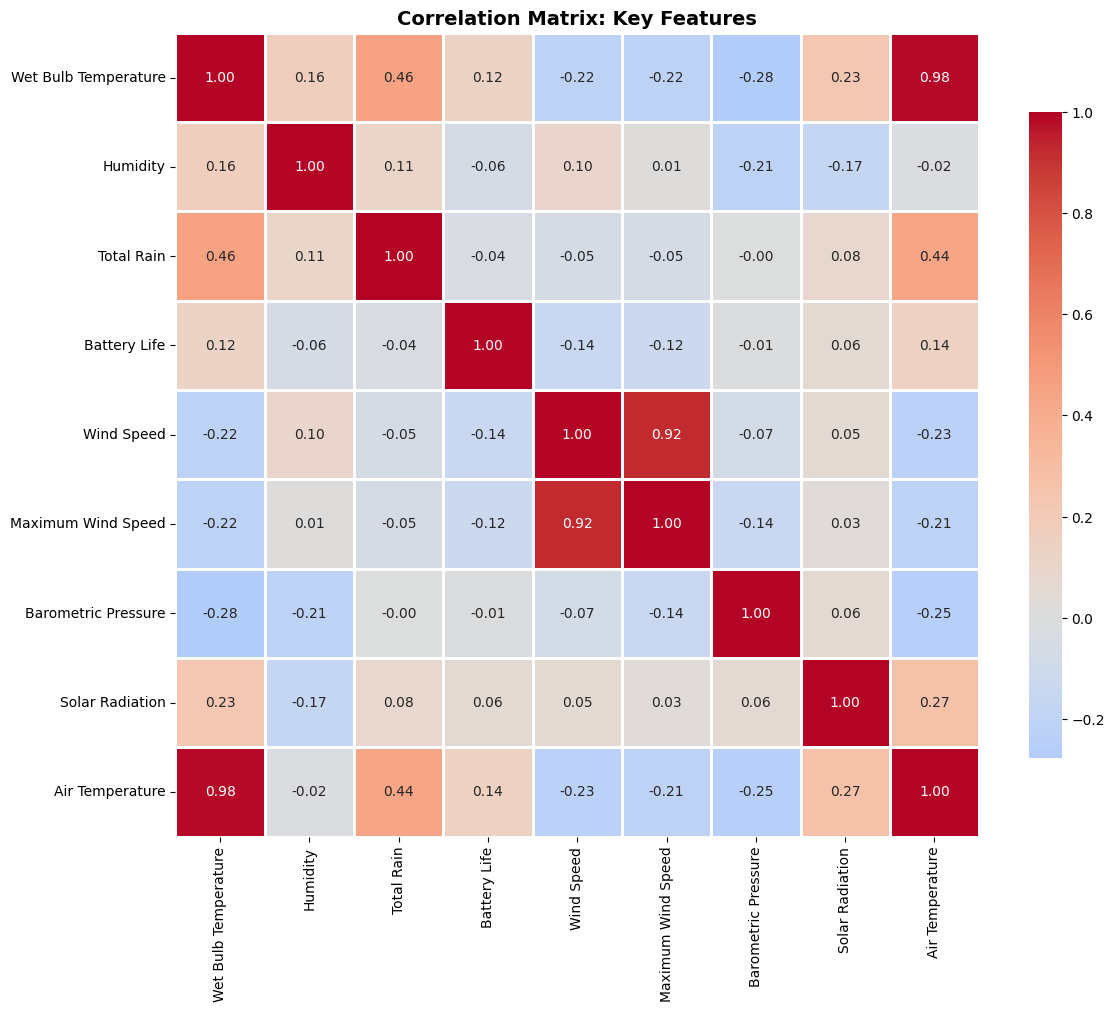

Moderate Correlations (|r| > 0.3)

- **Wet Bulb Temperature** ↔ **Air Temperature**: `0.981`
- **Wind Speed** ↔ **Maximum Wind Speed**: `0.923`
- **Wet Bulb Temperature** ↔ **Total Rain**: `0.461`
- **Total Rain** ↔ **Air Temperature**: `0.437`

In [34]:
### 1. `output/q5_correlations.csv`
# Correlation matrix 

#Include index/column names** when saving: `corr_matrix.to_csv('output/q5_correlations.csv')
# Select numeric features for correlation
#top 10 most important variables)
numeric_features = ['Wet Bulb Temperature', 'Humidity', 'Total Rain', 'Battery Life',
                    'Wind Speed', 'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation', 'Air Temperature']

corr_matrix = df[numeric_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Key Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

from IPython.display import Markdown,display 

# Identify strongest correlations
display(Markdown("Moderate Correlations (|r| > 0.3)"))

corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

corr_list = "\n".join([f"- **{feat1}** ↔ **{feat2}**: `{corr:.3f}`"
                       for feat1, feat2, corr in sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)])
display(Markdown(corr_list))


#save :#nclude index/column names** when saving: `corr_matrix.to_csv('output/q5_correlations.csv')`
corr_matrix.to_csv('output/q5_correlations.csv', index= True, header =True)

#for later documentation:
#Moderate Correlations (|r| > 0.3)
#Wet Bulb Temperature ↔ Air Temperature: 0.981
#Wind Speed ↔ Maximum Wind Speed: 0.923
#Wet Bulb Temperature ↔ Total Rain: 0.461
#Total Rain ↔ Air Temperature: 0.437




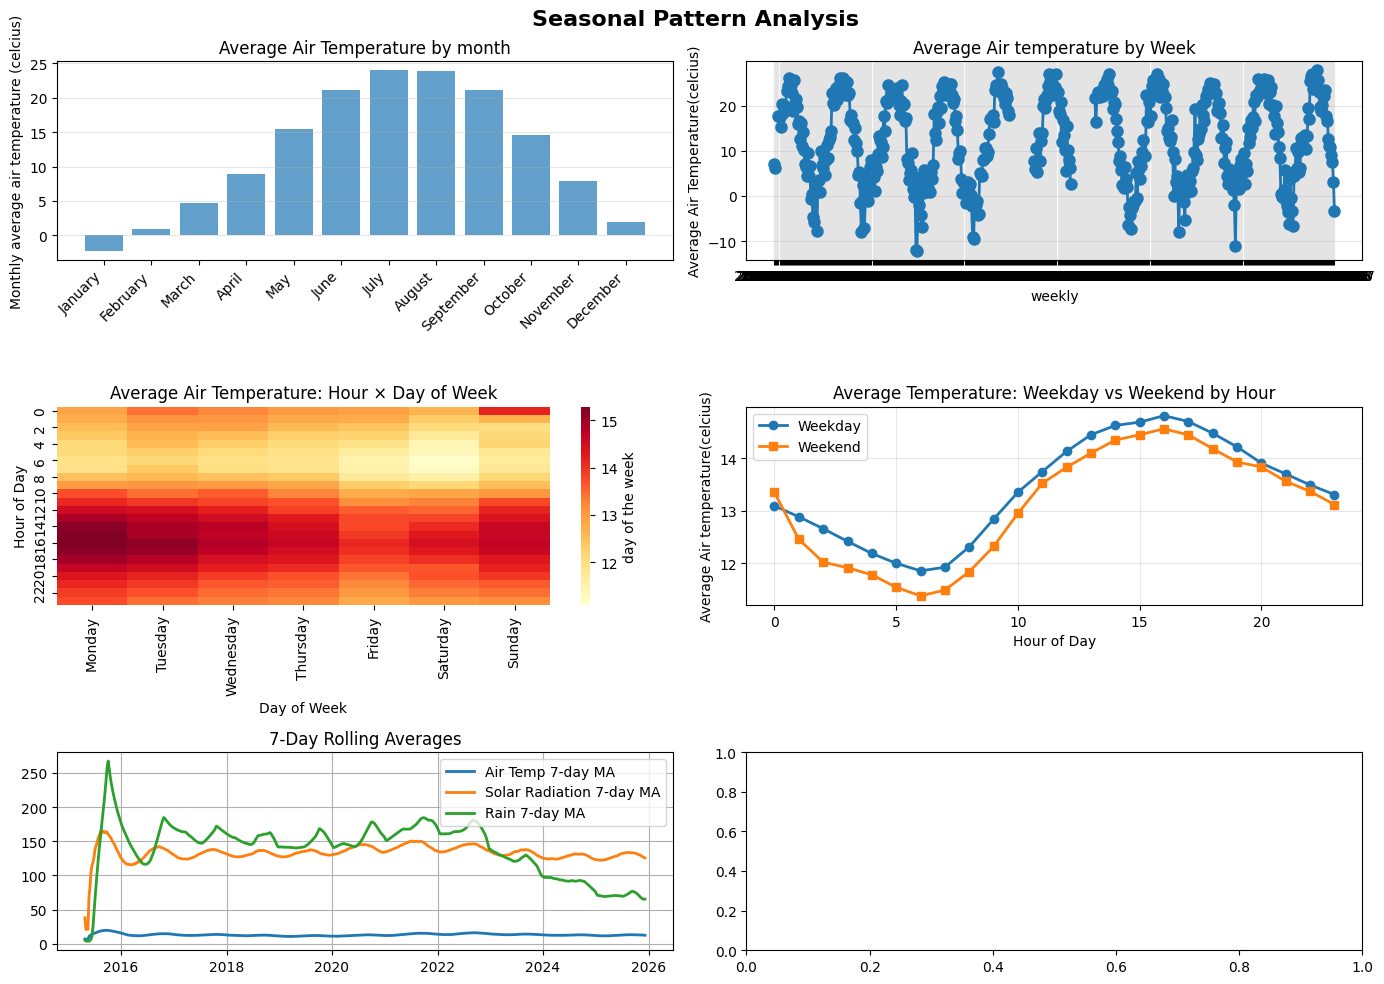

In [35]:
### 2. `output/q5_patterns.png`
#Format: PNG image file
#Content:Advanced visualizations showing trends/seasonality
#Saved as PNG with sufficient resolution (dpi=150 or higher)
#lecture7 

#Analyze patterns by week 
#weekly = df.groupby('W')['Air Temperature'].agg(['mean', 'std', 'count'])
weekly = df['Air Temperature'].resample ('W').agg(['mean', 'std', 'count'])

#Analyze patterns by week 
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = df.index.day_name()

#aggregate by day of the week 
daily_by_dow = df.groupby('day_name')['Air Temperature'].agg(['mean', 'std', 'count']).reindex(day_order)

#Analyze patterns by Month 
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October', 'November','December']
df['month_name'] = df.index.month_name() #extracts month name 

#aggregare by month 
monthly_by_dow = df.groupby('month_name')['Air Temperature'].agg(['mean', 'std', 'count']).reindex(month_order)


#Visualize seasonal patterns
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
fig.suptitle('Seasonal Pattern Analysis', fontsize=16, fontweight='bold')

#Average temperature by month oreder 
axes[0, 0].bar(range(len(monthly_by_dow)), monthly_by_dow['mean'], alpha=0.7)
axes[0, 0].set_xticks(range(len(monthly_by_dow)))
axes[0, 0].set_xticklabels(monthly_by_dow.index, rotation=45, ha='right')
axes[0, 0].set_title('Average Air Temperature by month')
axes[0, 0].set_ylabel('Monthly average air temperature (celcius)')
axes[0, 0].grid(True, alpha=0.3, axis='y')

#Average temperature by week
axes[0, 1].plot(weekly.index, weekly['mean'], marker='o', linewidth=2, markersize=8)
axes[0, 1].set_title('Average Air temperature by Week')
axes[0, 1].set_xlabel('weekly')
axes[0, 1].set_ylabel('Average Air Temperature(celcius)')
axes[0, 1].set_xticks(weekly.index)
axes[0, 1].grid(True, alpha=0.3)

#Hourly pattern (heatmap by day of week)

df['hour'] = df.index.hour

hourly_dow = df.groupby(['day_name', 'hour'])['Air Temperature'].mean().unstack(level=0).reindex(columns=day_order)
sns.heatmap(hourly_dow, annot=False, cmap='YlOrRd', ax=axes[1, 0], cbar_kws={'label': 'day of the week'})
axes[1, 0].set_title('Average Air Temperature: Hour × Day of Week')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Hour of Day')

#Weekend vs weekday comparison
df['is_weekend'] = df.index.weekday >=5
weekend_comparison = df.groupby(['is_weekend', 'hour'])['Air Temperature'].mean().unstack(level=0)
axes[1, 1].plot(weekend_comparison.index, weekend_comparison[False], label='Weekday', marker='o', linewidth=2)
axes[1, 1].plot(weekend_comparison.index, weekend_comparison[True], label='Weekend', marker='s', linewidth=2)
axes[1, 1].set_title('Average Temperature: Weekday vs Weekend by Hour')
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Average Air temperature(celcius)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)


#Comparable 7 day-trends between 
# Resample to weekly for trend analysis
weekly_trend = df.resample('W').agg({
    'Air Temperature': 'mean',
    'Solar Radiation': 'mean',
    'Total Rain': 'mean' 
})


#calculate moving averages for pattern trends comparison
#7 x 24 h = 168 h 
weekly_trend['temp_7d_ma'] = weekly_trend['Air Temperature'].rolling(window=168, min_periods=1).mean()
weekly_trend['radiation_7d_ma'] = weekly_trend['Solar Radiation'].rolling(window=168, min_periods=1).mean()
weekly_trend['rain_7d_ma'] = weekly_trend['Total Rain'].rolling(window=168, min_periods=1).mean()

#plot 
for col, label in zip(['temp_7d_ma', 'radiation_7d_ma', 'rain_7d_ma'],
                      ['Air Temp 7-day MA', 'Solar Radiation 7-day MA', 'Rain 7-day MA']):
    axes[2,0].plot(weekly_trend.index, weekly_trend[col], label=label, linewidth=2)
axes[2,0].legend()
axes[2,0].set_title('7-Day Rolling Averages')
axes[2,0].grid(True)
plt.tight_layout()
plt.show()

#save :#Saved as PNG with sufficient resolution (dpi=150 or higher)

fig.savefig ("output/q5_patterns.png", dpi=300,bbox_inches='tight')
